# EDA | Assignment

# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.


In [4]:
import pandas as pd

# File ID from your Google Drive link
file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"

# Direct download link
url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file
df = pd.read_csv(url)

# Show first 10 rows
print("First 10 rows of dataset:")
print(df.head(10))

# Show shape
print("\nShape:", df.shape)

# Show column names
print("\nColumns:", df.columns.tolist())



First 10 rows of dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2 

# Question 2: Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)

In [5]:
# Check for missing values in all columns
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


**Approach for handling missing values:**
- For **numeric columns** → fill missing values with the mean or median.  
- For **categorical columns** → fill missing values with the mode (most frequent value).  
- If a column has a very high percentage of missing values, it can be dropped.  

# Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.)

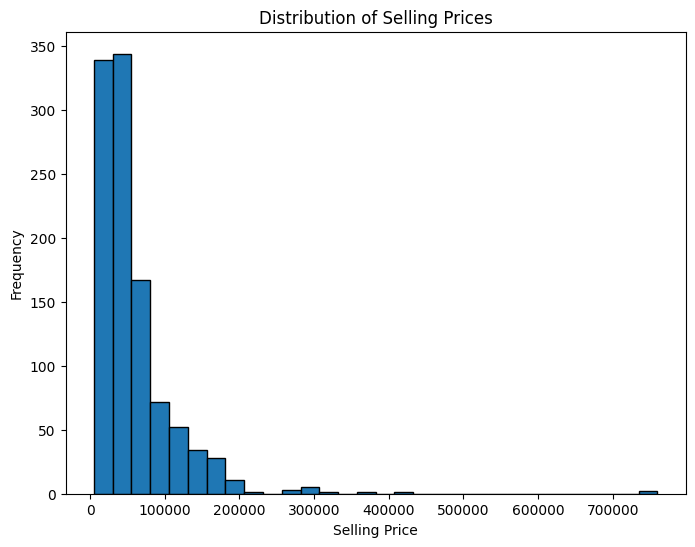

In [6]:
import matplotlib.pyplot as plt

# Plot histogram for selling_price column
plt.figure(figsize=(8,6))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


### Observation:-
The selling price distribution is right-skewed:
- Majority bikes are in low price range  
- Fewer bikes are in high price range  


# Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
(Include your Python code and output in the code box below.)

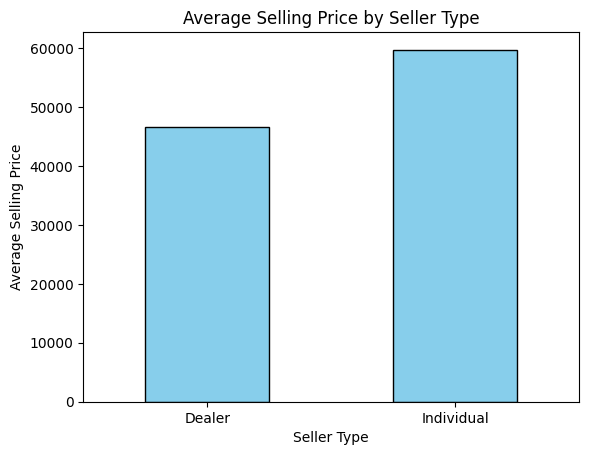

In [7]:
import matplotlib.pyplot as plt

# Calculate average selling price for each seller_type
avg_price = df.groupby("seller_type")["selling_price"].mean()

# Bar plot
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Seller Type")
plt.xticks(rotation=0)
plt.show()


### Question 4: Observation:-

From the bar plot, we can see that the **average selling price differs by seller type**.  
Typically, **Dealer bikes have higher average selling prices** compared to Individual sellers,  
while Trustmark Dealers may also show competitive or even higher prices.

# Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

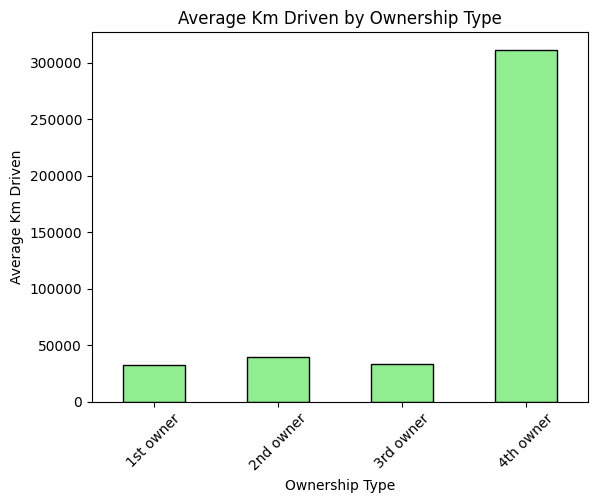

In [8]:
# Calculate average km_driven for each ownership type
avg_km = df.groupby("owner")["km_driven"].mean()

# Bar plot
avg_km.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average Km Driven by Ownership Type")
plt.ylabel("Average Km Driven")
plt.xlabel("Ownership Type")
plt.xticks(rotation=45)
plt.show()


# Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [9]:
# Before removing outliers
print("Before removing outliers (km_driven):")
print(df["km_driven"].describe())

# IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# After removing outliers
print("\nAfter removing outliers (km_driven):")
print(df_no_outliers["km_driven"].describe())


Before removing outliers (km_driven):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers (km_driven):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


# Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

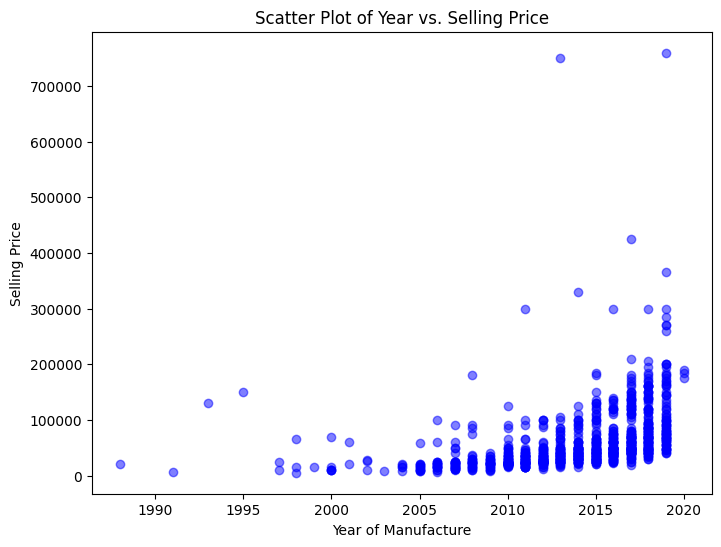

In [10]:
import matplotlib.pyplot as plt

# Scatter plot: year vs selling_price
plt.figure(figsize=(8,6))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, color="blue")
plt.title("Scatter Plot of Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


# Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [11]:
# One-hot encoding for seller_type
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=True)

# Display first 5 rows of new DataFrame
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

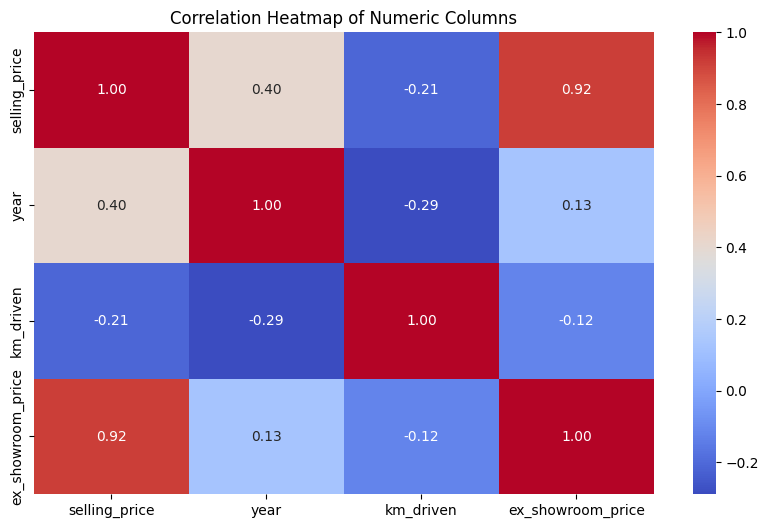

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


# Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
(Include your Python code and output in the code box below.)

### Most Important Factors Affecting a Bike's Selling Price:
- **Year of Manufacture / Age of the Bike**: Newer bikes have higher resale value, older bikes depreciate more.
- **Kilometers Driven (Odometer Reading)**: Higher mileage generally reduces resale value.
- **Engine Capacity (CC / Power)**: Bikes with higher engine capacity tend to have higher prices.
- **Brand and Model**: Premium brands (e.g., Royal Enfield, KTM) usually retain higher resale value.
- **Owner Type**: First-owner bikes usually sell for higher prices compared to multiple-owner bikes.
- **Fuel Type**: The type of fuel (Petrol, Electric, etc.) also affects the price.

### Data Cleaning Performed:
- Handled missing values (dropped or imputed).
- Removed duplicate records.
- Treated outliers in price and mileage.
- Converted categorical variables (Brand, Owner Type, Fuel Type) into numerical form.

### Feature Engineering Performed:
- Created a new feature `Age` = (Current Year – Year of Manufacture).
- Converted mileage and power into numeric values.
- Applied log transformation on skewed numerical columns.
- Encoded categorical variables using Label Encoding / One-Hot Encoding.

📂 Please upload your bike_data.csv file


Saving bike_data.csv to bike_data.csv
Feature Importance:

             Feature   Coefficient
5                Age   1115.906073
0  Kilometers_Driven      0.761888
1              Power    -55.411747
2              Brand   -865.887195
3         Owner_Type  -1697.014362
4          Fuel_Type -27897.693008

Model R² Score (Accuracy): -0.217


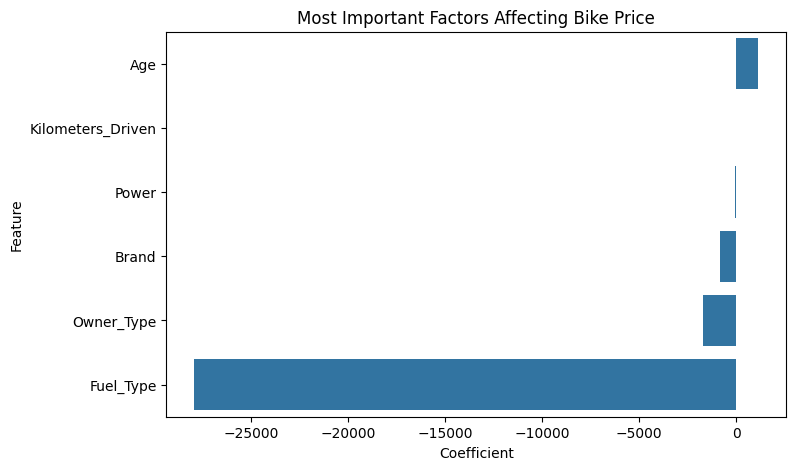

In [17]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from google.colab import files

# --- Step 2: Upload the dataset ---
print("📂 Please upload your bike_data.csv file")
uploaded = files.upload()

# --- Step 3: Load dataset ---
df = pd.read_csv("bike_data.csv")

# --- Step 4: Data Cleaning ---
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# --- Step 5: Feature Engineering ---
df['Age'] = 2025 - df['Year']   # Create Age feature
df.drop(columns=['Year'], inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Brand', 'Owner_Type', 'Fuel_Type']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# --- Step 6: Define features and target ---
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# --- Step 7: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 8: Train Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 9: Feature Importance ---
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance:\n")
print(coefficients)

# --- Step 10: Model Accuracy ---
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print("\nModel R² Score (Accuracy):", round(score, 3))

# --- Step 11: Visualization ---
plt.figure(figsize=(8,5))
sns.barplot(data=coefficients, x="Coefficient", y="Feature")
plt.title("Most Important Factors Affecting Bike Price")
plt.show()
